The purpose of this notebook is to apply the knowledge to forecasting exercises. You will be asked to apply different models to the same data and to choose the best model for that purpose. 

Souces: Hill et al. pp372-378

In [5]:
#Import the main libraries. 
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.core import datetools
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

C:\Users\Syuzi\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  import sys


Reminder:

Our working example for this case - Okun's Law

Before proceeding to analysis, let's understand the purpose. We want to estimate empirically the Okun's law for US for the period under consideration. Okun's Law represents the relationship between the change in Unemployment and the rate of growth of output in the economy

\begin{equation*}
U_t - U_{t-1} = - \gamma (G_t - G_N)
\end{equation*}

In [2]:
#load the .dta (stata) format data on US GDP from quarter 2, 1985 to quarter 3, 2009 (g GDP, u Unempl)
df = pd.read_stata('okun.dta')

In [3]:
df.head()

,g,u
0,1.4,7.3
1,2.0,7.2
2,1.4,7.0
3,1.5,7.0
4,0.9,7.2


### Assignment 1. Apply AR model to GDP data

In [4]:
#Create data index
ts = pd.period_range('1985Q2', periods=98, freq='Q')
df['Date'] = ts
df.set_index('Date', inplace=True)

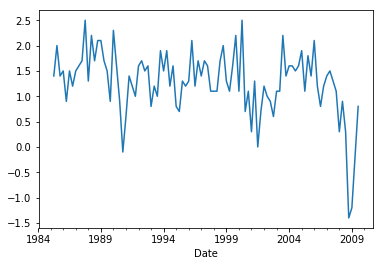

In [5]:
df['g'].plot() 
plt.show()

In [6]:
#Construct AR(2) model
df['lag_g1'] = df['g'].shift(1)
df['lag_g2'] = df['g'].shift(2)

In [7]:
# Import the linear regression from statsmodels
import statsmodels.api as sm

In [8]:
# drop columns and nan values
df.dropna(inplace=True)

In [9]:
# Prepare target and input variables.
X_multi=df.drop(['u','g'], axis=1)
Y_target=df.g

In [10]:
# Add the costant to our input variables
X_multi=sm.tools.tools.add_constant(X_multi, prepend=True, has_constant='skip')

In [11]:
# OLS Regression (Model with 3lags)
mod = sm.OLS(Y_target, X_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      g   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.06
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           1.16e-07
Time:                        19:28:01   Log-Likelihood:                -77.770
No. Observations:                  96   AIC:                             161.5
Df Residuals:                      93   BIC:                             169.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4657      0.143      3.251      0.0

### Assignment 2. Test whether the assumptions for the model are satisfied (serial correlation of errors)

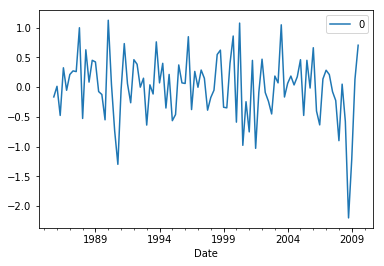

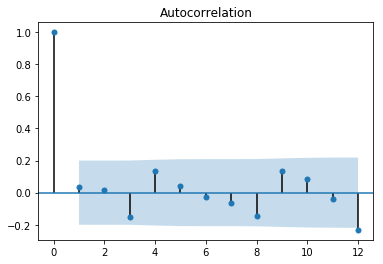

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
residuals = DataFrame(res.resid)
residuals.plot()
pyplot.show()
plot_acf(residuals,lags=12)
pyplot.show()

#Note: We ignore the spyke at lag 12, and conclude that the model generally is a suitable one. You can test different orders of lags and choose the best model using AIC of BIC criteria

### Assignment 3. Forecast GDP growth

In [13]:
#Start Arima 
from statsmodels.tsa.arima_model import ARIMA

In [14]:
df1 = pd.read_stata('okun.dta')
ts = pd.period_range('1985Q2', periods=98, freq='Q')
df1['Date'] = ts
df1.set_index('Date', inplace=True)
series = df1.g

In [15]:
series.head()

Date
1985Q2    1.4
1985Q3    2.0
1985Q4    1.4
1986Q1    1.5
1986Q2    0.9
Freq: Q-DEC, Name: g, dtype: float64

C:\Users\User\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\User\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\User\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array i

                              ARMA Model Results                              
Dep. Variable:                      g   No. Observations:                   98
Model:                     ARMA(2, 0)   Log Likelihood                 -79.343
Method:                       css-mle   S.D. of innovations              0.543
Date:                Thu, 14 Feb 2019   AIC                            166.685
Time:                        14:23:07   BIC                            177.025
Sample:                    06-30-1985   HQIC                           170.867
                         - 09-30-2009                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2663      0.140      9.014      0.000       0.991       1.542
ar.L1.g        0.3745      0.097      3.845      0.000       0.184       0.565
ar.L2.g        0.2439      0.100      2.427      0.0

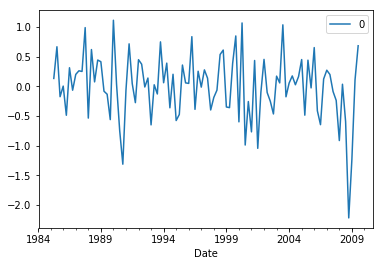

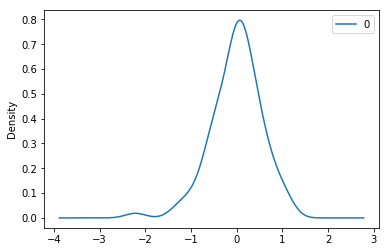

               0
count  98.000000
mean   -0.002834
std     0.545682
min    -2.215114
25%    -0.328608
50%     0.041124
75%     0.348088
max     1.113891


In [30]:
# fit model
model = ARIMA(series, order=(2,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [16]:
results = ARIMA(series, order=(2,0,0)).fit()
results.forecast(steps=3)

C:\Users\Syuzi\Anaconda2\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Syuzi\Anaconda2\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Syuzi\Anaconda2\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

(array([0.73409718, 0.95328121, 1.01928615]),
 array([0.5426006 , 0.5793953 , 0.61573635]),
 array([[-0.32938045,  1.7975748 ],
        [-0.1823127 ,  2.08887513],
        [-0.18753491,  2.22610721]]))

Note: Check with auto-Arima that the model proposed is in fact suitable one. Comment on the results that you obtain. 

## Assignment 4. ARDL model

Consider the following ARDL (1,1) model we estimated for Okun's Law

\begin{equation}
DU_t = \delta + \theta_1 DU_{t-1} + \delta_0 G_t + \delta_1 G_{t-1} + v_t
\end{equation}

The value of DU in the first post-sample quarter is: 

\begin{equation}
DU_{T+1} = \delta + \theta_1 DU_{T} + \delta_0 G_{T+1} + \delta_1 G_{T-1} + v_{T+1}
\end{equation}

Note: prove that this ARDL (1,1) model for a change in unemployment is equivalent to an ARDL (2,1) model for level of unemployment

\begin{equation}
U_{T+1} = \delta + (\theta_1+1) U_{T} - \theta_1 U_{T-1}  + \delta_0 G_{T+1} + \delta_1 G_{T-1} + v_{T+1}
\end{equation}

In [17]:
#as a first step obtain the differenced values of unemployment and lags of GDP gro
#Create laged and differenced variables for further analysis
df['lag_g1'] = df['g'].shift(1)
df['lag_u1'] = df['u'].shift(1)
df['lag_u2'] = df['u'].shift(2)

In [35]:
df.head()

,g,u,lag_g1,lag_g2,lag_u1,lag_u2
Date,,,,,,
1985Q4,1.4,7.0,NaN,1.4,NaN,NaN
1986Q1,1.5,7.0,1.4,2.0,7.0,NaN
1986Q2,0.9,7.2,1.5,1.4,7.0,7.0
1986Q3,1.5,7.0,0.9,1.5,7.2,7.0
1986Q4,1.2,6.8,1.5,0.9,7.0,7.2


In [18]:
# drop columns and nan values
df.dropna(inplace=True)

In [19]:
# Prepare target and input variables.
X1_multi=df.drop(['u','lag_g2'], axis=1)
Y_target=df.u

In [20]:
# Add the costant to our input variables
X1_multi=sm.tools.tools.add_constant(X1_multi, prepend=True, has_constant='skip')

In [21]:
# OLS Regression (Model with 3lags)
mod = sm.OLS(Y_target, X1_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      u   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1108.
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           5.44e-75
Time:                        19:29:11   Log-Likelihood:                 41.373
No. Observations:                  94   AIC:                            -72.75
Df Residuals:                      89   BIC:                            -60.03
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5768      0.110      5.265      0.0

In [40]:
#try with SARIMAX

In [22]:
model=sm.tsa.statespace.SARIMAX(endog=df['u'],exog=df[['g','lag_g1']],order=(2,0,0),seasonal_order=(0,0,0,0),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                      u   No. Observations:                   94
Model:               SARIMAX(2, 0, 0)   Log Likelihood                  19.664
Date:                Sun, 17 Feb 2019   AIC                            -27.329
Time:                        19:29:20   BIC                            -12.069
Sample:                    06-30-1986   HQIC                           -21.165
                         - 09-30-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2493      0.122      2.041      0.041       0.010       0.489
g             -0.0333      0.032     -1.041      0.298      -0.096       0.029
lag_g1        -0.0287      0.026     -1.103      0.2

In [23]:
results.forecast(steps=3, exog=([1, 1], [1, 1],[1, 1] ))

2009Q4    9.692397
2010Q1    9.643757
2010Q2    9.456386
Freq: Q-DEC, dtype: float64

In [24]:
df.tail()

,g,u,lag_g1,lag_g2,lag_u1,lag_u2
Date,,,,,,
2008Q3,0.3,6.1,0.9,0.3,5.4,4.9
2008Q4,-1.4,6.9,0.3,0.9,6.1,5.4
2009Q1,-1.2,8.1,-1.4,0.3,6.9,6.1
2009Q2,-0.2,9.3,-1.2,-1.4,8.1,6.9
2009Q3,0.8,9.6,-0.2,-1.2,9.3,8.1


# Assignment 5. Single Exponential Smoothing

In [3]:
# Import the toolpack
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

In [7]:
#Prepare the data
df1 = pd.read_stata('okun.dta')
ts = pd.period_range('1985Q2', periods=98, freq='Q')
df1['Date'] = ts
df1.set_index('Date', inplace=True)
series = df1.g

When building a Single Exponential Smoothing Model, the choice of the smoothing parameter alpha is very important. If α is high (closer to 1), more weight is given to the more recent observations. There are 2 extreme cases:

1) α=0: the forecasts of all future values are equal to the average of the historical data, which is called Average method.

2) α=1: all forecasts are set to be the value of the last observation. This is called the Naive method.

We will run three various versions of the model, explicitly providing 2 different values of alpha at first and then using the auto optimization method. 

In [16]:
#For the first fit, we set a low value of alpha, 0.2.
fit1 = SimpleExpSmoothing(series).fit(smoothing_level=0.2,optimized=False)

In [19]:
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')

In [10]:
#For the second fit, we set a higher value of alpha, 0.6.
fit2 = SimpleExpSmoothing(series).fit(smoothing_level=0.6,optimized=False)

In [11]:
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')

In [12]:
#Finally, in fit3 we let the statsmodel to automatically find an optimized value of alpha.
fit3 = SimpleExpSmoothing(series).fit()

In [13]:
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

<Figure size 7200x14400 with 0 Axes>

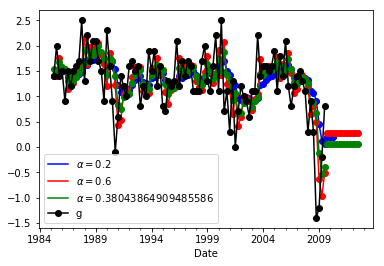

<Figure size 7200x14400 with 0 Axes>

In [18]:
#Plotting the original and smoothed values.
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')

fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o',  color='red')

fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')

series.plot(marker="o", color="black", legend=True)

plt.figure(figsize=(100,200))

In [ ]:
#Forecast the values of g for the next three quarters.

In [18]:
fit1.forecast(steps=3)

2009Q4    0.206239
2010Q1    0.206239
2010Q2    0.206239
Freq: Q-DEC, dtype: float64

In [19]:
fit2.forecast(steps=3)

2009Q4    0.275879
2010Q1    0.275879
2010Q2    0.275879
Freq: Q-DEC, dtype: float64

In [20]:
fit3.forecast(steps=3)

2009Q4    0.053719
2010Q1    0.053719
2010Q2    0.053719
Freq: Q-DEC, dtype: float64

Note the difference between the results depending on the value of alpha.



For future references:


Single exponential smoothing models are better fit for short-term forecasting of series without trends or seasonal patterns. For series with trend and/or seasonality, double exponential smoothing methods can be used. For instance, Holt's method is used to account for trends in series and Holt-Winter's method is used to account for trends and seasonality at the same time.